In [1]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="root"
)

print(mydb)

In [2]:
#Ejercicio 1: A partir de los documentos adjuntos (estructura y datos), crea una base de datos con MySQL.
# Muestra las principales características del esquema creado y explica las diferentes tablas y variables existentes.

mycursor = mydb.cursor()

mycursor.execute("SHOW DATABASES")

for x in mycursor:
  print(x)

('information_schema',)
('movies',)
('mysql',)
('performance_schema',)
('sgae_practica',)


In [11]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="root",
  database="movies"
)
mycursor = mydb.cursor()

mycursor.execute("SHOW TABLES")

for x in mycursor:
  print(x)

('tb_genre',)
('tb_movie',)
('tb_movie_person',)
('tb_person',)
('tb_role',)


Este esquema de base de datos "movies" está diseñado para almacenar información relacionada con películas, géneros, personas involucradas en películas y sus roles. También incluye datos que indican si han recibido premios por su participación. Las tablas están relacionadas entre sí mediante claves primarias y foráneas para mantener la integridad referencial de los datos. 

In [12]:
#Ejercicio 2:obtener el nombre, el país y la fecha de nacimiento de aquellas personas por las que no conste una fecha de muerte 
# y ordenar los datos de la persona más vieja a la persona más joven.

mycursor = mydb.cursor()

sql = """
SELECT person_name, person_country, person_dob
FROM tb_person
WHERE person_dod IS NULL
ORDER BY person_dob ASC;
"""
mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

('John Williams', 'United States', datetime.date(1928, 8, 8))
('Vera Miles', 'United States', datetime.date(1929, 8, 23))
('Sean Connery', 'Scotland', datetime.date(1930, 7, 8))
('Robert Duvall', 'United States', datetime.date(1931, 1, 5))
('Morgan Freeman', 'United States', datetime.date(1935, 10, 1))
('Francis Ford Coppola', 'United States', datetime.date(1939, 4, 7))
('Gary Kurtz', 'United States', datetime.date(1940, 7, 27))
('Martin Sheen', 'United States', datetime.date(1940, 8, 3))
('Harrison Ford', 'United States', datetime.date(1942, 7, 13))
('George Lucas', 'United States', datetime.date(1944, 5, 14))
('Carmine Coppola', 'United States', datetime.date(1945, 7, 8))
('Steven Spielberg', 'United States', datetime.date(1946, 12, 18))
('Tim Robbins', 'United States', datetime.date(1949, 6, 7))
('Mel Gibson', 'Australia', datetime.date(1950, 8, 9))
('Tom Hanks', 'United States', datetime.date(1956, 7, 9))
('Emilio Martinez Lazaro', 'Spain', datetime.date(1956, 9, 9))
('Karra Elejal

In [13]:
#Ejercicio 3: Obtener el nombre del género y el número total de películas de ese género y ordenarlo por orden descendente 
# de número total de películas.  

mycursor = mydb.cursor()

sql = """
    SELECT g.genre_name AS Nombre_del_Género,
           COUNT(m.movie_id) AS Número_Total_de_Películas
    FROM movies.tb_genre g
    LEFT JOIN movies.tb_movie m ON g.genre_id = m.movie_genre_id
    GROUP BY g.genre_name
    ORDER BY Número_Total_de_Películas DESC;
"""

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

('Comedia', 3)
('Acción', 2)
('Ciencia Ficción', 2)
('Drama', 2)
('Suspense', 2)
('Fantasía', 1)
('Romance', 1)
('Terror', 1)
('Bélico', 1)
('Melodrama', 0)
('Musical', 0)
('Documental', 0)


In [14]:
#Ejericio 4:Obtener, para cada persona, su nombre y el número máximo de roles distintos que ha tenido en una misma película.
# Posteriormente, muestra únicamente a aquellas personas que hayan asumido más de un rol en una misma película.

mycursor = mydb.cursor()

sql = """
SELECT
  p.person_name,
  COUNT(DISTINCT mp.role_id) AS max_roles_in_a_movie,
  GROUP_CONCAT(DISTINCT r.role_name ORDER BY r.role_name ASC) AS roles_assumed
FROM
  movies.tb_movie_person mp
JOIN
  movies.tb_person p ON mp.person_id = p.person_id
JOIN
  movies.tb_role r ON mp.role_id = r.role_id
GROUP BY
  p.person_name
HAVING
  COUNT(DISTINCT mp.role_id) > 1;
"""

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)



('Alfred Joseph Hitchcock', 3, 'Actor,Director,Productor')
('Francis Ford Coppola', 3, 'Director,Música,Productor')
('George Lucas', 3, 'Actor,Director,Guionista')
('Mel Gibson', 2, 'Actor,Director')
('Steven Spielberg', 2, 'Director,Productor')


In [ ]:
#Ejercicio5: Crear un nuevo género llamado "Documental" que tenga como identificador el número 69.


mycursor = mydb.cursor()

sql = "DELETE FROM movies.tb_genre WHERE genre_id = 12;"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

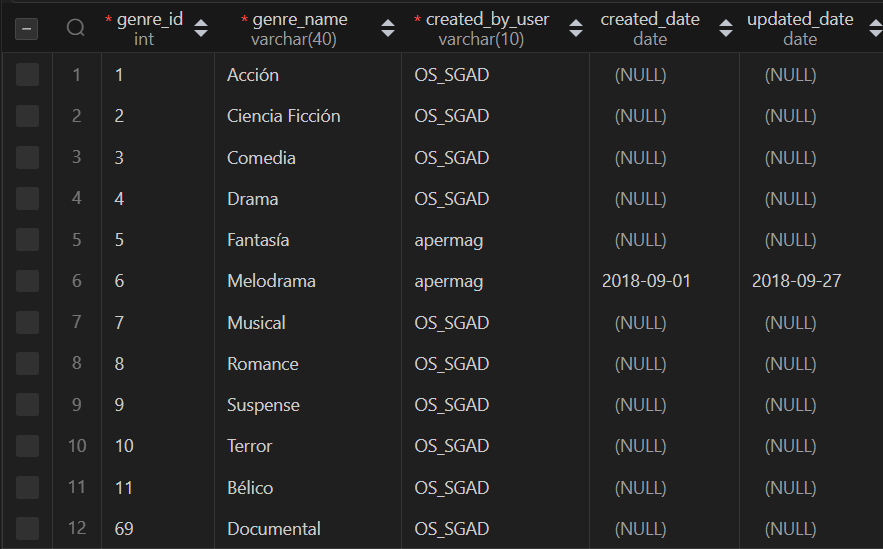

In [19]:

from IPython.display import Image
ruta_imagen = "C:\\Users\\acbon\\Desktop\\Data Science\\ejercicio5.png"


Image(filename=ruta_imagen)

In [ ]:
#Ejercicio 6: Realiza la siguiente operación sobre la base de datos recién creada:
# Elimina la película "La Gran Familia Española" de la base de datos.


mycursor = mydb.cursor()

sql = """
DELETE FROM movies.tb_movie_person
WHERE movie_id = (SELECT movie_id FROM movies.tb_movie WHERE movie_title = 'La Gran Familia Española');

DELETE FROM movies.tb_movie
WHERE movie_title = 'La Gran Familia Española';
"""

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

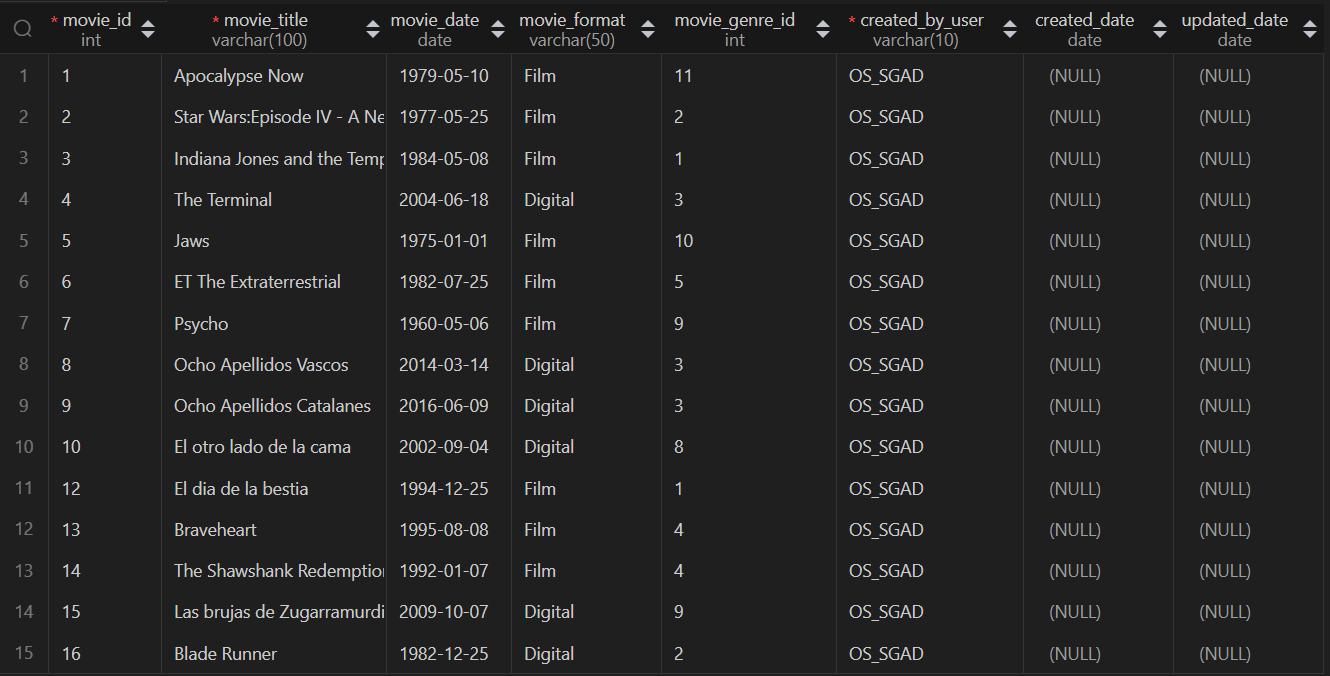

In [20]:
from IPython.display import Image
ruta_imagen = "C:\\Users\\acbon\\Desktop\\Data Science\\ejercicio6.png"


Image(filename=ruta_imagen)

In [ ]:
#Ejercicio 7:Cambia el género de la película "Ocho apellidos catalanes" para que conste como comedia y no como romántica.

mycursor = mydb.cursor()

sql = """
UPDATE movies.tb_movie
SET movie_genre_id = (
   SELECT genre_id
   FROM movies.tb_genre
   WHERE genre_name = 'Comedia'
)
WHERE movie_id = 123; 
"""

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

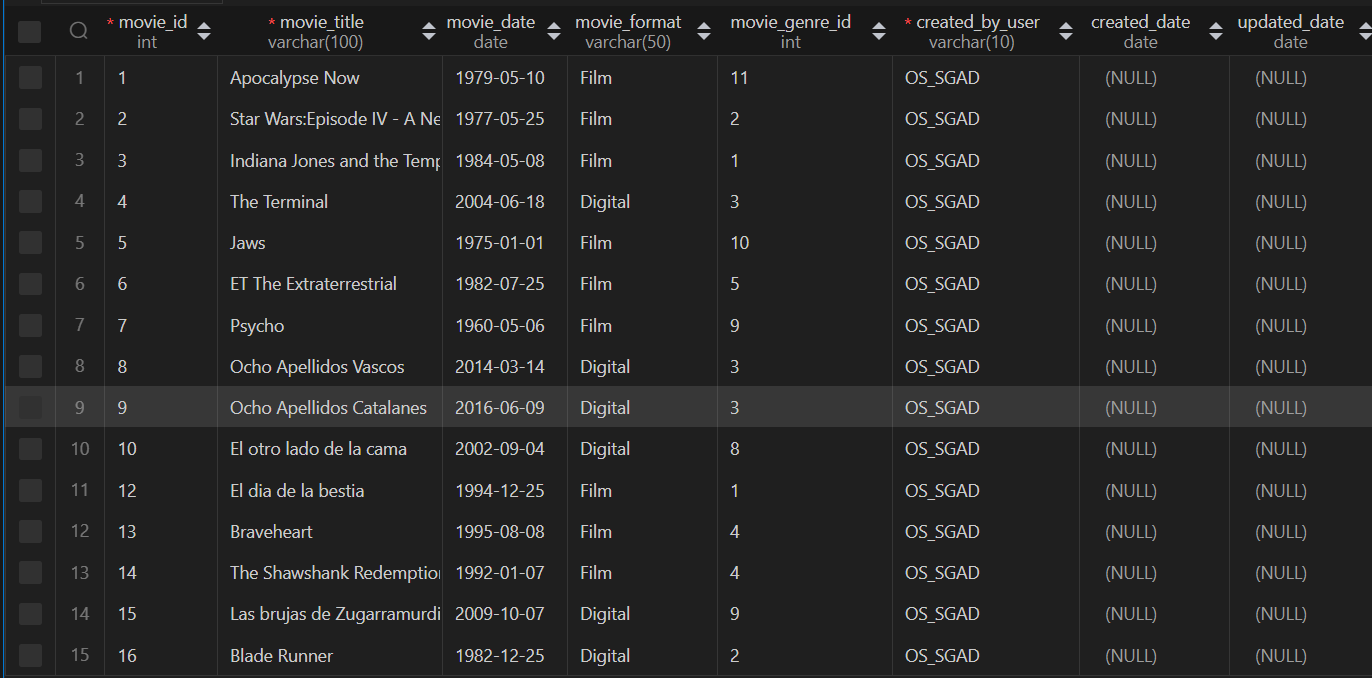

In [23]:
from IPython.display import Image
ruta_imagen = "C:\\Users\\acbon\\Desktop\\Data Science\\ejercicio7.png"



Image(filename=ruta_imagen)

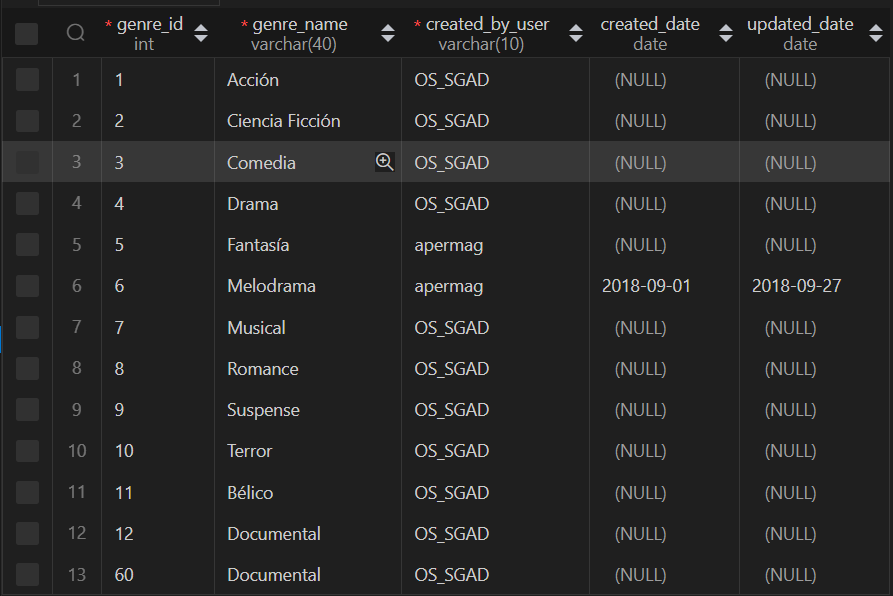

In [24]:
from IPython.display import Image
ruta_imagen = "C:\\Users\\acbon\\Desktop\\Data Science\\ejercicio7.1.png"


Image(filename=ruta_imagen)